Atividade 2 TÓPICOS COMPUTACIONAIS EM CIÊNCIA DE DADOS - Ciências da Computação <br>
Bernardo Gontijo Vaz Guimarães<br>
Dados escolhidos UNSW_NB15

In [58]:
# Importando as bibliotecas a serem utilizadas
import pandas as pd
import numpy as np

# Geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Análise de correlação entre cat
from scipy.stats import chi2_contingency

# Preproc, normalização
from sklearn.preprocessing import StandardScaler

#Dividir dataset entre teste e reino
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Avaliação dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Redução de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Carregando os dados a serem utilizados

In [2]:
# Carregando a lista de Features
features = pd.read_csv('csv_files/NUSW-NB15_features.csv',
                       encoding_errors='ignore',
                       index_col='No.'
                      )

In [3]:
# Informações das colunas do Dataset
#print(features)

In [4]:
# Lista para ser usada como header dos dados
header = list(features['Name'])
header

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [5]:
# Selecionando colunas a serem usadas
columns = [
     'proto',
     'state',
     'dur',
     'sbytes',
     'dbytes',
     'sttl',
     'dttl',
     'sloss',
     'dloss',
     'service',
     'Spkts',
     'Dpkts',
     'ct_state_ttl',
     'ct_srv_src',
     'ct_srv_dst',
     'ct_src_dport_ltm',
     'ct_dst_sport_ltm',
     'ct_dst_src_ltm',
     'attack_cat',
     'Label'
    ]

**Colunas não usadas:** <br>
srcip e dstip -> outros atributos já trabalham as relações entre a origem e o destino <br>
stime e ltime -> colunas dur já trabalha o tratamento de tempo necessário <br>
ct_flw_http_mthd -> mais de 50% dos valores faltantes <br>
dsport -> outros atributos já trabalham as relações entre a origem e o destino <br>
Atributos abaixo foram retirados por conta de baixa correlação com labels <br>
swin e dwin <br>
stcpb e dtcpb <br>
is_sm_ips_ports <br>
trans_depth <br>
res_bdy_len <br>
ct_ftp_cmd <br>
is_ftp_login <br>
ct_dst_ltm <br>
ct_src_ ltm <br>
Sjit<br>
Djit<br>
tcprtt<br>
synack<br> 
smeansz<br>
dmeansz<br>
Sload<br>
Dload<br>

In [6]:
# Conversores para tratar os dados no carregamento
converter = {
    'is_ftp_login': lambda x: np.int64(1) if x=='1' else np.int64(0),
    'is_sm_ips_ports': lambda x: np.int64(1) if x=='1' else np.int64(0),
    'ct_ftp_cmd': lambda x: np.int64(x) if x != ' ' else np.int64(0)
}

In [7]:
# Definição dos tipos das colunas no carregamento
dtype = {
    'attack_cat': np.str_
}

Carregando os arquivos em 4 processos

In [8]:
data1 = pd.read_csv('csv_files/data/UNSW-NB15_1.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

In [9]:
data2 = pd.read_csv('csv_files/data/UNSW-NB15_2.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

In [10]:
data3 = pd.read_csv('csv_files/data/UNSW-NB15_3.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

In [11]:
data4 = pd.read_csv('csv_files/data/UNSW-NB15_4.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

Concatenando os arquivos

In [12]:
data = pd.concat([data1,data2,data3,data4],ignore_index=True)
data.head()
data.shape

(2540047, 20)

In [13]:
# Verificando tipos das colunas e adicionando funções ao converter para consertar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Spkts             int64  
 11  Dpkts             int64  
 12  ct_state_ttl      int64  
 13  ct_srv_src        int64  
 14  ct_srv_dst        int64  
 15  ct_src_dport_ltm  int64  
 16  ct_dst_sport_ltm  int64  
 17  ct_dst_src_ltm    int64  
 18  attack_cat        object 
 19  Label             int64  
dtypes: float64(1), int64(15), object(4)
memory usage: 387.6+ MB


In [14]:
# Verificando a Coluna que possuia valores vazios
#data['ct_ftp_cmd'].unique()

In [15]:
# Contando os NAs nas colunas
for i in range(data.shape[1]):
    print(data.columns[i],data.isna().sum().iloc[i])

proto 0
state 0
dur 0
sbytes 0
dbytes 0
sttl 0
dttl 0
sloss 0
dloss 0
service 0
Spkts 0
Dpkts 0
ct_state_ttl 0
ct_srv_src 0
ct_srv_dst 0
ct_src_dport_ltm 0
ct_dst_sport_ltm 0
ct_dst_src_ltm 0
attack_cat 2218764
Label 0


In [16]:
# Usado para verificar a % de NAs na coluna
#data['ct_flw_http_mthd'].isna().sum()/data.shape[0]

In [17]:
# % de NAs no attack cat
data['attack_cat'].isna().sum()/data.shape[0]

np.float64(0.8735129704292873)

In [18]:
# Pegando as colunas numéricas descritivass
descr_cols = list(data.describe().columns)[:-1] # até -1 para tirar o label

In [19]:
descr_cols

['dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'Spkts',
 'Dpkts',
 'ct_state_ttl',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm']

In [20]:
# Verificar relação entre os atributos numéricos e label
data.groupby(['Label'])[descr_cols].mean().iloc[:,0:15]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Spkts,Dpkts,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
Label,,,,,,,,,,,,,,,
0,0.648411,4121.088225,41058.519224,37.100686,28.566358,5.534693,18.393768,36.797789,48.087476,0.034048,7.627581,7.397207,3.362240,2.608133,4.961239
1,0.730478,5848.631674,4446.658613,240.135647,45.963020,2.603390,2.073325,9.056246,5.704986,1.829543,20.114295,19.981509,13.481059,10.392299,19.861163


In [21]:
data.groupby(['Label'])[descr_cols].mean().iloc[:,16:30]

""
Label
0
1


In [22]:
data.groupby(['Label'])[descr_cols].mean().iloc[:,30:-1]

""
Label
0
1


In [23]:
data_mean_label = data.groupby(['Label'])[descr_cols].mean()

Verificação da relação das médias calc na mão

In [24]:
for i in range(len(data_mean_label.columns)):
    relation = (data_mean_label.iloc[:,i][1])/(data_mean_label.iloc[:,i][0])
    print(relation)

1.12656645299003
1.4191959391803253
0.10830051099180006
6.472539298692753
1.6089912714405996
0.47037663704751126
0.11271887178715687
0.2461084392630613
0.11863766618906847
53.73456138352663
2.6370477125525724
2.701223480052429
4.009546874705317
3.984573753148697
4.003266881833508


In [25]:
for i in range(len(data_mean_label.columns)):
    print(data_mean_label.iloc[:,i][1],data_mean_label.iloc[:,i][0])
    print(data_mean_label.iloc[:,i][1]/data_mean_label.iloc[:,i][0])

0.7304782731268072 0.6484111711191456
1.12656645299003
5848.631673633526 4121.088224795427
1.4191959391803253
4446.658612500506 41058.51922376602
0.10830051099180006
240.13564676624657 37.100685787222076
6.472539298692753
45.96302014112169 28.56635766579952
1.6089912714405996
2.603390157586925 5.534692738840183
0.47037663704751126
2.073324763526237 18.39376788157731
0.11271887178715687
9.056246362241389 36.797788768882135
0.2461084392630613
5.704985946968872 48.08747618043199
0.11863766618906847
1.8295428018289173 0.03404778516327108
53.73456138352663
20.114294873989596 7.627580941461102
2.6370477125525724
19.981508514300476 7.397206733118078
2.701223480052429
13.481058755053956 3.3622399678379495
4.009546874705317
10.392299001192095 2.6081331768498135
3.984573753148697
19.861162899997822 4.961238779789108
4.003266881833508


In [26]:
# Iterar sobre o agrupado e calcular a diferença entre as médias dos marcados como ataque e não marcados para encontrar os que têm diferença maior que 2x
big_mean_diff = list()
for i in range(len(data_mean_label.columns)):
    relation = (data_mean_label.iloc[:,i][1])/(data_mean_label.iloc[:,i][0])
    if relation >= 2 or relation <=0.5: 
        print(data_mean_label.columns[i],relation)
        big_mean_diff.append(data_mean_label.columns[i])
big_mean_diff

dbytes 0.10830051099180006
sttl 6.472539298692753
sloss 0.47037663704751126
dloss 0.11271887178715687
Spkts 0.2461084392630613
Dpkts 0.11863766618906847
ct_state_ttl 53.73456138352663
ct_srv_src 2.6370477125525724
ct_srv_dst 2.701223480052429
ct_src_dport_ltm 4.009546874705317
ct_dst_sport_ltm 3.984573753148697
ct_dst_src_ltm 4.003266881833508


['dbytes',
 'sttl',
 'sloss',
 'dloss',
 'Spkts',
 'Dpkts',
 'ct_state_ttl',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm']

Produzindo uma matriz de correlação para avaliar os atributos com

In [27]:
# Pearson correlation
num_corr = data.corr(numeric_only=True)
num_corr.iloc[:,-1].sort_values()

Spkts              -0.120880
Dpkts              -0.115947
dloss              -0.095855
dbytes             -0.075543
sloss              -0.043272
dur                 0.001959
sbytes              0.010180
dttl                0.134947
ct_srv_src          0.383007
ct_srv_dst          0.386509
ct_src_dport_ltm    0.396749
ct_dst_sport_ltm    0.419056
ct_dst_src_ltm      0.439916
ct_state_ttl        0.873694
sttl                0.904393
Label               1.000000
Name: Label, dtype: float64

In [28]:
# Kendall correlation
num_corr = data.corr(numeric_only=True, method='kendall')
num_corr.iloc[:,-1].sort_values()

dttl               -0.416054
Dpkts              -0.364095
dbytes             -0.363397
sbytes             -0.348955
Spkts              -0.292236
dloss              -0.281369
sloss              -0.280588
dur                -0.258458
ct_srv_dst          0.215734
ct_srv_src          0.222227
ct_dst_src_ltm      0.309146
ct_src_dport_ltm    0.378263
ct_dst_sport_ltm    0.458937
sttl                0.736718
ct_state_ttl        0.919764
Label               1.000000
Name: Label, dtype: float64

In [29]:
# Spearman correlation
num_corr = data.corr(numeric_only=True, method='spearman')
num_corr.iloc[:,-1].sort_values()

dbytes             -0.433614
Dpkts              -0.429284
dttl               -0.422565
sbytes             -0.420797
Spkts              -0.340038
dloss              -0.322032
dur                -0.315860
sloss              -0.312964
ct_srv_dst          0.254983
ct_srv_src          0.263057
ct_dst_src_ltm      0.349463
ct_src_dport_ltm    0.407662
ct_dst_sport_ltm    0.484185
sttl                0.760892
ct_state_ttl        0.932251
Label               1.000000
Name: Label, dtype: float64

**Colunas com correlação forte à label em todos os métodos:**<br>
sttl <br>
ct_state_ttl <br>

Investigando a proporção de linha para ataque e para não ataque.

In [30]:
data['Label'].value_counts()

Label
0    2218764
1     321283
Name: count, dtype: int64

In [31]:
# Percentual de linhas de ataque
perc_ataque = data['Label'].value_counts()[1]/data['Label'].value_counts().sum()
perc_normal = data['Label'].value_counts()[0]/data['Label'].value_counts().sum()
print('Percentual de Atq:',perc_ataque)
print('Percentual de Normal:',perc_normal)

Percentual de Atq: 0.12648702957071267
Percentual de Normal: 0.8735129704292873


In [32]:
list(data['Label'].value_counts().index)

[0, 1]

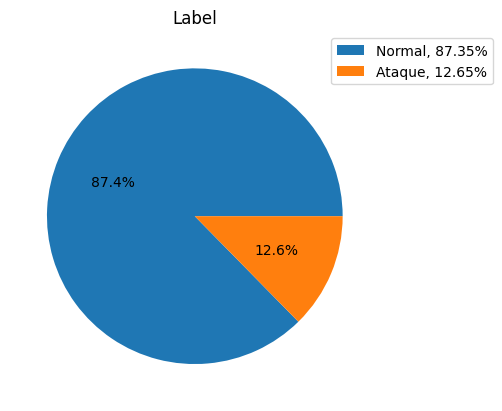

In [33]:
fig, ax = plt.subplots()
plt.title('Label')
ax.pie(data['Label'].value_counts(),
       autopct='%1.1f%%'
      );
labels = [f'{l}, {s*100/data['Label'].value_counts().sum():.2f}%' for l, s in zip(['Normal','Ataque'], data['Label'].value_counts())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels);

**Investigando os atributos categóricos:**

In [34]:
# Colunas categóricas
data.select_dtypes(include='object').columns

Index(['proto', 'state', 'service', 'attack_cat'], dtype='object')

In [35]:
# Pegar colunas categóricas
cat_columns = list(data.select_dtypes(include='object').columns)
for coluna in cat_columns:
    print(data[coluna].value_counts())

proto
tcp     1495074
udp      990435
unas      16202
arp       10064
ospf       7798
         ...   
3pc         137
igmp         64
udt           8
rtp           7
esp           2
Name: count, Length: 135, dtype: int64
state
FIN    1478689
CON     560588
INT     490471
REQ       9043
RST        528
ECO        337
CLO        161
URH        108
ACC         43
PAR         30
TST          9
ECR          9
URN          8
no           8
MAS          8
TXD          7
Name: count, dtype: int64
service
-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64
attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor     

Forte correlação entre label e as variáveis categóricas

**Pre-processamento: OHE nos dados categóricos**

In [36]:
#One Hot encoding colunas categóricas
ohe_cat_data = pd.get_dummies(
    data[cat_columns[:-1]],
    dtype=np.int32
)

In [37]:
ohe_columns = ohe_cat_data.columns
ohe_columns

Index(['proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus',
       'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna',
       ...
       'service_ftp', 'service_ftp-data', 'service_http', 'service_irc',
       'service_pop3', 'service_radius', 'service_smtp', 'service_snmp',
       'service_ssh', 'service_ssl'],
      dtype='object', length=164)

In [38]:
ohe_cat_data.shape

(2540047, 164)

In [39]:
ohe_cat_data.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# concatenando os DFs em um só DF
preproc_data = pd.concat([data[descr_cols],ohe_cat_data],axis=1)
preproc_data

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Spkts,Dpkts,ct_state_ttl,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.001055,132,164,31,29,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0.036133,528,304,31,29,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
2,0.001119,146,178,31,29,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0.001209,132,164,31,29,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0.001169,146,178,31,29,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,0.087306,320,1828,31,29,1,2,6,8,0,...,0,1,0,0,0,0,0,0,0,0
2540043,0.365058,456,346,31,29,2,2,8,6,0,...,1,0,0,0,0,0,0,0,0,0
2540044,6.335154,1802,2088,31,29,7,9,32,30,0,...,1,0,0,0,0,0,0,0,0,0
2540045,2.200934,3498,166054,31,29,2,57,58,116,0,...,0,0,1,0,0,0,0,0,0,0


**Dividindo os dados em samples de teste e treino**

In [41]:
#Usando o train test split do scikitlearn com stratify para garantir uma proporção similar de attack e normal
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    preproc_data,
    data['Label'],
    test_size = 0.25,
    stratify = data['Label'],
    random_state=19
)

In [42]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (1905035, 179)
X_test Shape: (635012, 179)
y_train Shape: (1905035,)
y_test Shape: (635012,)


In [43]:
print('X_train Head:',X_train.head())
print('X_test Head:',X_test.head())
print('y_train Head:',y_train.head())
print('y_test Head:',y_test.head())

X_train Head:               dur  sbytes   dbytes  sttl  dttl  sloss  dloss  Spkts  Dpkts  \
1809470  0.001059     146      178    31    29      0      0      2      2   
328557   0.019120    2854    29168    31    29      7     17     46     48   
841376   2.641740   19618  1087890    31    29      2    370    368    746   
1958201  0.000005     264        0    60     0      0      0      2      0   
2259848  0.361363     320     1908    31    29      1      2      6      8   

         ct_state_ttl  ...  service_ftp  service_ftp-data  service_http  \
1809470             0  ...            0                 0             0   
328557              0  ...            0                 0             0   
841376              0  ...            0                 0             1   
1958201             0  ...            0                 0             0   
2259848             0  ...            0                 1             0   

         service_irc  service_pop3  service_radius  service_smtp  

In [44]:
#Normalizando os dados com standard scaler
scaler = StandardScaler()

In [45]:
# Fazer o fit dos dados usando a base de treino e depois transformar a base de teste e treino com eles
std_fit_train = scaler.fit(
    X_train[descr_cols]
)

In [46]:
# Normalizar os dados numéricos de teste e criar uma nova tabela concatenando os categoricos com one hot encoding e os dados normalziados
X_test_std_descr = pd.DataFrame(
    std_fit_train.transform(X_test[descr_cols]),
    columns=X_test[descr_cols].columns
)
df_xtest_std = pd.concat([X_test_std_descr,X_test[ohe_columns].reset_index()],
                         axis=1
                        )
print(df_xtest_std.shape)
print(df_xtest_std.head());

(635012, 180)
        dur    sbytes    dbytes      sttl      dttl     sloss     dloss  \
0 -0.049711 -0.073193 -0.226294 -0.037321 -0.718477 -0.231972 -0.288696   
1 -0.037628  0.014880  0.339294 -0.425923 -0.040719  0.082225  0.400033   
2  0.044520  0.157806  3.175028 -0.425923 -0.040719  0.710620  3.190267   
3 -0.048998 -0.037928 -0.131764 -0.425923 -0.040719  0.082225 -0.094439   
4 -0.049627 -0.075310 -0.225189 -0.425923 -0.040719 -0.231972 -0.288696   

      Spkts     Dpkts  ct_state_ttl  ...  service_ftp  service_ftp-data  \
0 -0.411627 -0.351764     -0.382388  ...            0                 0   
1  0.745126  0.404887     -0.382388  ...            0                 0   
2  2.559126  3.250554     -0.382388  ...            0                 0   
3  0.009011 -0.055683     -0.382388  ...            0                 0   
4 -0.411627 -0.335315     -0.382388  ...            0                 0   

   service_http  service_irc  service_pop3  service_radius  service_smtp  \
0       

In [47]:
X_test[ohe_columns].shape

(635012, 164)

In [48]:
# Normalizar os dados numéricos de treino e criar uma nova tabela concatenando os categoricos com one hot encoding e os dados normalziados
X_train_std_descr = pd.DataFrame(
    std_fit_train.transform(X_train[descr_cols]),
    columns=list(X_train[descr_cols].columns)
)
df_xtrain_std = pd.concat([X_train_std_descr,X_train[ohe_columns].reset_index()],axis=1)
print(df_xtrain_std.shape)
print(df_xtrain_std.head())

(1905035, 180)
        dur    sbytes    dbytes      sttl      dttl     sloss     dloss  \
0 -0.049631 -0.075310 -0.225189 -0.425923 -0.040719 -0.231972 -0.288696   
1 -0.048260 -0.026735 -0.045325 -0.425923 -0.040719  0.082225  0.011519   
2  0.150814  0.273969  6.523352 -0.425923 -0.040719 -0.142202  6.245396   
3 -0.049711 -0.073193 -0.226294 -0.037321 -0.718477 -0.231972 -0.288696   
4 -0.022282 -0.072189 -0.214456 -0.425923 -0.040719 -0.187087 -0.253377   

      Spkts     Dpkts  ct_state_ttl  ...  service_ftp  service_ftp-data  \
0 -0.411627 -0.335315     -0.382388  ...            0                 0   
1  0.166750  0.043010     -0.382388  ...            0                 0   
2  4.399415  5.783692     -0.382388  ...            0                 0   
3 -0.411627 -0.351764     -0.382388  ...            0                 0   
4 -0.359047 -0.285969     -0.382388  ...            0                 1   

   service_http  service_irc  service_pop3  service_radius  service_smtp  \
0      

**Rodar o modelo mais simples de regressão logística para ter uma base de resultados**

In [77]:
# Inicializa o construtor
log_ref = LogisticRegression(random_state=19,
                             max_iter=500
                             #solver='saga'
                            ).fit(df_xtrain_std,y_train)

In [78]:
# Prediçao na base teste
log_ref_predict = log_ref.predict(df_xtest_std)

In [79]:
# Cálculo do score
log_ref.score(df_xtest_std,y_test)

0.9827641052452553

***Análise da Regressão Logística***

In [80]:
cm = confusion_matrix(log_ref_predict,y_test)
cm

array([[546160,   2414],
       [  8531,  77907]])

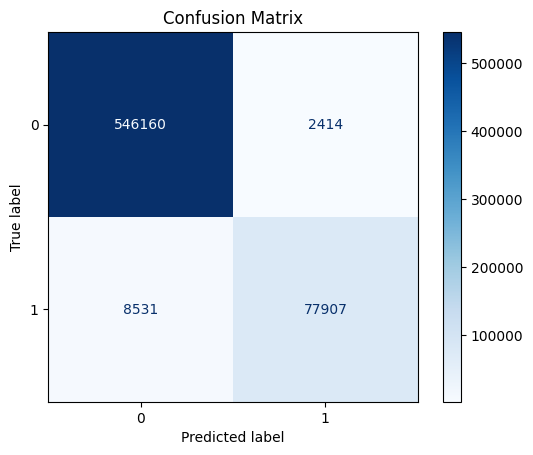

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                             )
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [84]:
print(classification_report(log_ref_predict,y_test,
                            zero_division=np.nan
                           ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    548574
           1       0.97      0.90      0.93     86438

    accuracy                           0.98    635012
   macro avg       0.98      0.95      0.96    635012
weighted avg       0.98      0.98      0.98    635012



In [86]:
# Avaliando as features mais importantes
coef = pd.DataFrame(log_ref.coef_,columns=df_xtest_std.columns)
coef = coef.T.sort_values(0,ascending=False)
display(coef[0:10])
display(coef[-10:-1])

,0
sttl,1.703122
ct_state_ttl,1.423341
dttl,0.915083
ct_dst_sport_ltm,0.763180
sbytes,0.589353
sloss,0.490250
service_http,0.403626
state_INT,0.402999
ct_src_dport_ltm,0.264935
proto_unas,0.235150


,0
proto_arp,-0.125078
state_REQ,-0.337024
service_dns,-0.343321
ct_srv_dst,-0.424629
ct_srv_src,-0.531625
proto_udp,-1.123777
state_CON,-1.402211
state_FIN,-1.536107
proto_tcp,-2.285552


In [263]:
#display(coef[0:10])
#display(coef[10:20])
display(coef[-11:-1])
#display(coef[-21:-11])
display(coef.loc['Sjit'])
display(coef.loc['ackdat'])
display(coef.loc['synack'])
display(coef.loc['tcprtt'])
display(coef.loc['Djit'])
display(coef.loc['Sload'])

,0
dmeansz,-0.111949
smeansz,-0.114443
tcprtt,-0.131228
service_dns,-0.133871
Dload,-0.172728
synack,-0.173542
proto_udp,-0.244301
state_CON,-0.319980
service_-,-0.442546
state_FIN,-0.456561


0   -0.049417
Name: Sjit, dtype: float64

0   -0.063913
Name: ackdat, dtype: float64

0   -0.173542
Name: synack, dtype: float64

0   -0.131228
Name: tcprtt, dtype: float64

0   -0.008265
Name: Djit, dtype: float64

0   -0.096986
Name: Sload, dtype: float64

**Testando Gradient Boost**

In [70]:
grad_boost = GradientBoostingClassifier(n_estimators=100,
                                        learning_rate=0.1,
                                        max_depth=3,
                                        random_state=0
                                       ).fit(df_xtrain_std,y_train)

In [71]:
grad_boost_predict = grad_boost.predict(df_xtest_std)

In [72]:
grad_boost.score(df_xtest_std,y_test)

0.991705668554295

In [73]:
cm = confusion_matrix(grad_boost_predict,y_test)

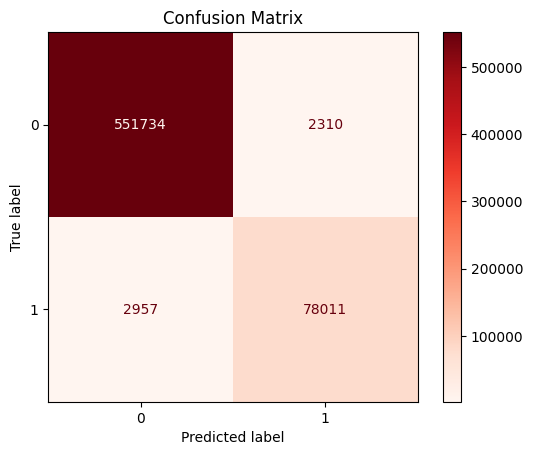

In [74]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                             )
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [75]:
print(classification_report(y_test,grad_boost_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    554691
           1       0.96      0.97      0.97     80321

    accuracy                           0.99    635012
   macro avg       0.98      0.98      0.98    635012
weighted avg       0.99      0.99      0.99    635012



In [87]:
feat_gb = pd.DataFrame(grad_boost.feature_importances_).T
feat_gb.columns = df_xtest_std.columns
feat_gb = feat_gb.T.sort_values(0,ascending=False)
display(feat_gb[0:10])
display(feat_gb[-10:-1])

,0
ct_state_ttl,0.734454
sttl,0.185170
sbytes,0.022398
ct_srv_dst,0.015360
proto_tcp,0.008895
ct_dst_sport_ltm,0.006256
service_-,0.005885
sloss,0.005211
dbytes,0.004546
ct_dst_src_ltm,0.002222


,0
proto_iso-tp4,0.0
proto_l2tp,0.0
proto_micp,0.0
proto_larp,0.0
proto_leaf-1,0.0
proto_leaf-2,0.0
proto_merit-inp,0.0
proto_mfe-nsp,0.0
proto_mhrp,0.0


**Testando SVC**

In [65]:
#svc = SVC().fit(df_xtrain_std,y_train)

In [66]:
#svc_predict = svc.predict(df_xtest_std)

In [67]:
#svc.score(df_xtest_std,y_test)

In [68]:
#confusion_matrix(svc_predict,y_test)

In [69]:
#print(classification_report(y_test,svc_predict))

**Redução de dimensionalidade**

***Redução usando PCA***

In [88]:
pca = PCA(n_components=2)
fit_pca = pca.fit_transform(preproc_data)

In [89]:
df_pca = pd.DataFrame(fit_pca, columns=['PC1','PC2'])
df_pca_labeled = pd.concat([df_pca,data['Label']],axis=1)
print(df_pca_labeled)

                   PC1          PC2  Label
0        -36336.166655 -3526.680404      0
1        -36188.761410 -3133.374452      0
2        -36321.906564 -3512.945541      0
3        -36336.166673 -3526.680436      0
4        -36321.906547 -3512.945513      0
...                ...          ...    ...
2540042  -34668.927227 -3369.921549      0
2540043  -36148.115734 -3206.145495      0
2540044  -34381.147538 -1893.034832      0
2540045  129587.842807 -3272.871353      0
2540046  -35815.954149 -3094.340234      1

[2540047 rows x 3 columns]


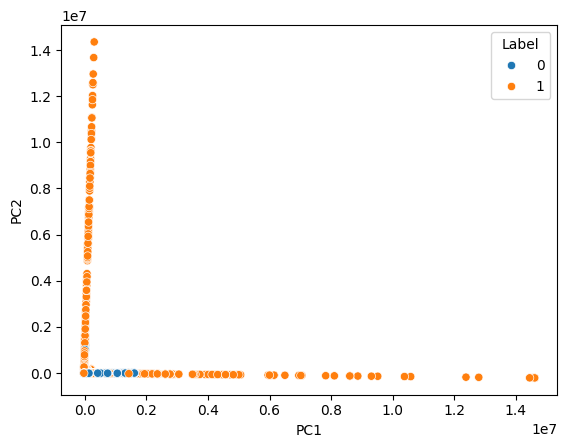

In [90]:
sns.scatterplot(
    data=df_pca_labeled,
    x='PC1',
    y='PC2',
    hue='Label'
);

***Redução por tSNE***

In [92]:
fit_tsne = TSNE().fit_transform(preproc_data)

KeyboardInterrupt: 

In [ ]:
df_fit_tsne = pd.DataFrame(fit_tsne, columns=['T1','T2'])
df_fit_tsne_labeled = pd.concat([df_fit_tsne,data['Label']],axis=1)
df_fit_tsne_labeled

In [ ]:
sns.scatterplot(
    data=df_fit_tsne_labeled,
    x='T1',
    y='T2',
    hue='Label'
);

In [93]:
pca_tsne = PCA(n_components=10)

In [94]:
fit_pca_tsne = pca_tsne.fit_transform(preproc_data)

In [96]:
fit_tsne_pca = TSNE(n_components=3, 
                  learning_rate='auto',
                  init='random',
                  perplexity=50
                 ).fit_transform(fit_pca_tsne)

KeyboardInterrupt: 

In [ ]:
df_fit_tsne_pca = pd.DataFrame(fit_tsne_pca)
df_fit_tsne_labeled_pca = pd.concat([fit_tsne_pca,data['Label']],axis=1)
df_fit_tsne_labeled_pca